In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# for handling imbalancing
from imblearn.under_sampling import NearMiss
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix

import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

# for learning rate decay
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

fileurl="/content/drive/MyDrive/ML dataset/train.csv"
df=pd.read_csv(fileurl)



In [3]:
df

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297955,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297956,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297957,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297958,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.tail()


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
297955,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297956,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297957,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297958,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297959,13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import os
for dirname, _, filenames in os.walk('train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import NearMiss

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


In [7]:
y = df['0']
del df['0']

In [8]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         B
1         S
2         B
3         S
4         S
         ..
297955    S
297956    Y
297957    N
297958    O
297959    N
Name: 0, Length: 297960, dtype: object

In [ ]:
y = alpha_data['0']
del alpha_data['0']

In [15]:
x = y.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
x

0         B
1         S
2         B
3         S
4         S
         ..
297955    S
297956    Y
297957    N
297958    O
297959    N
Name: 0, Length: 297960, dtype: object

In [34]:
x


0         B
1         S
2         B
3         S
4         S
         ..
297955    S
297956    Y
297957    N
297958    O
297959    N
Name: 0, Length: 297960, dtype: object

In [31]:
from imblearn.under_sampling import NearMiss
nM = NearMiss()
X_data, y_data = nM.fit_resample(df, y)

<Axes: ylabel='count'>

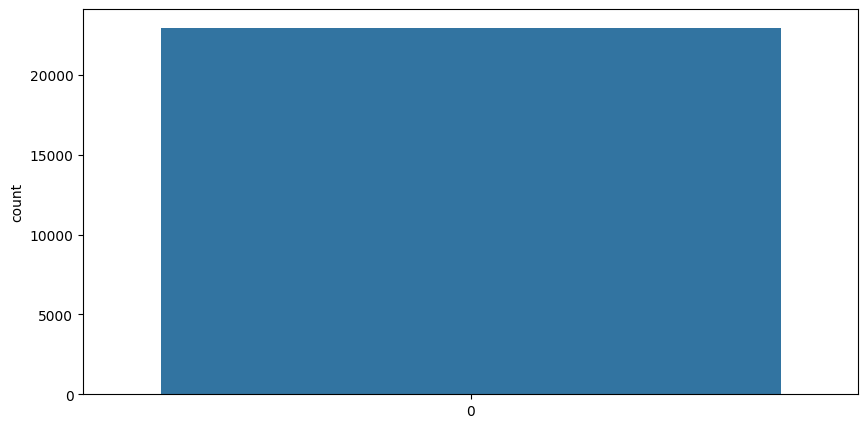

In [32]:
plt.figure(figsize = (10,5))
sns.countplot(y_data)


<Axes: ylabel='count'>

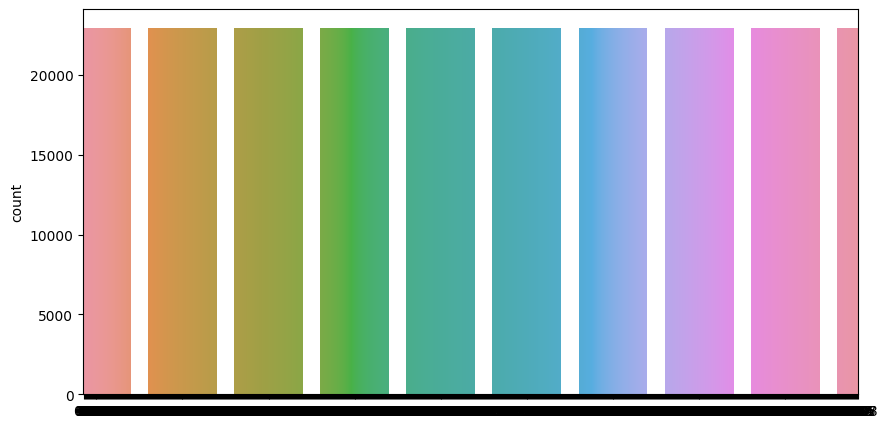

In [33]:
plt.figure(figsize = (10,5))
sns.countplot(X_data)


In [38]:
#One-Hot-Encoding of the target.
from keras.utils import np_utils
y = np_utils.to_categorical(y_data)
# Define the classification of 26 alphabets.
num_classes = y.shape[1]
num_classes

26

In [39]:
y


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [40]:
y.shape , X_data.shape

((22958, 26), (22958, 784))

In [41]:
X_data = X_data / 255
X_data

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22954,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


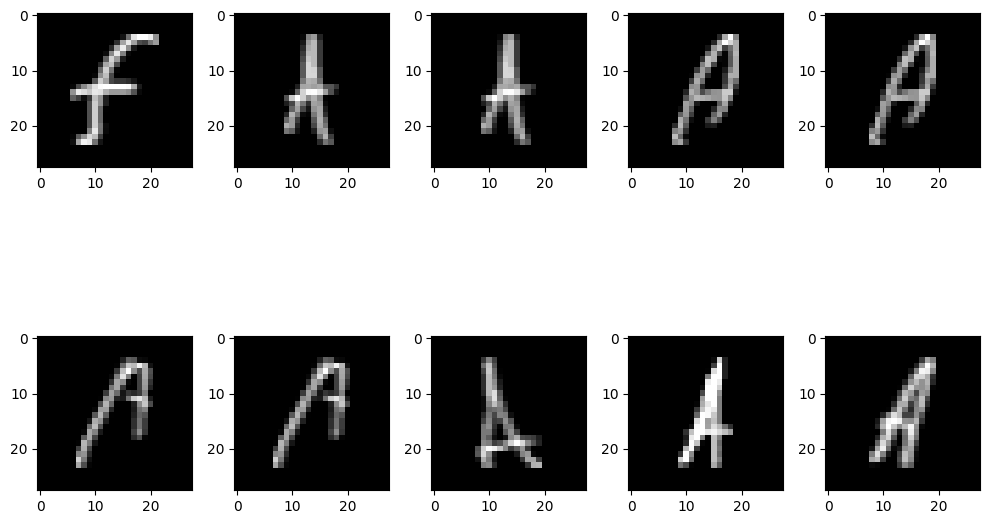

In [43]:
import numpy as np
X_data = np.array(X_data)
X_data = X_data.reshape(-1,28,28,1)
# Showing few images

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18366, 28, 28, 1), (4592, 28, 28, 1), (18366, 26), (4592, 26))

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2 ,random_state=102)

# MODEL 1


In [50]:
history = model.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
144/144 [==============================] - 11s 7ms/step - loss: 0.5265 - accuracy: 0.8472 - val_loss: 0.2211 - val_accuracy: 0.9408
Epoch 2/15
144/144 [==============================] - 1s 5ms/step - loss: 0.1287 - accuracy: 0.9623 - val_loss: 0.1997 - val_accuracy: 0.9490
Epoch 3/15
144/144 [==============================] - 1s 5ms/step - loss: 0.0879 - accuracy: 0.9748 - val_loss: 0.1457 - val_accuracy: 0.9634
Epoch 4/15
144/144 [==============================] - 1s 4ms/step - loss: 0.0521 - accuracy: 0.9840 - val_loss: 0.1700 - val_accuracy: 0.9641
Epoch 5/15
144/144 [==============================] - 1s 5ms/step - loss: 0.0549 - accuracy: 0.9817 - val_loss: 0.1869 - val_accuracy: 0.9608
Epoch 6/15
144/144 [==============================] - 1s 4ms/step - loss: 0.0383 - accuracy: 0.9875 - val_loss: 0.1919 - val_accuracy: 0.9676
Epoch 7/15
144/144 [==============================] - 1s 4ms/step - loss: 0.0463 - accuracy: 0.9864 - val_loss: 0.1996 - val_accuracy: 0.9654
Epoch

In [48]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
#Build an ordinary "Deep Learning" model with CNN and maxpooling by using Keras.
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
#Choose an optimizer and compile the model.
model.compile(optimizer = Adam(learning_rate = 0.01), loss = 'categorical_crossentropy', metrics = ['accuracy'])
#And print the summary of the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 26)                3354      
                                                                 
Total params: 594,138
Trainable params: 594,138
Non-trainable params: 0
__________________________________________________

In [52]:
history = model.fit(X_train,y_train,epochs=15, batch_size=128, validation_data=(X_test,y_test))

Epoch 1/15
144/144 [==============================] - 1s 6ms/step - loss: 0.0407 - accuracy: 0.9913 - val_loss: 0.2928 - val_accuracy: 0.9636
Epoch 2/15
144/144 [==============================] - 1s 5ms/step - loss: 0.0332 - accuracy: 0.9926 - val_loss: 0.3334 - val_accuracy: 0.9660
Epoch 3/15
144/144 [==============================] - 1s 5ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0.3440 - val_accuracy: 0.9736
Epoch 4/15
144/144 [==============================] - 1s 5ms/step - loss: 0.0244 - accuracy: 0.9935 - val_loss: 0.3675 - val_accuracy: 0.9676
Epoch 5/15
144/144 [==============================] - 1s 5ms/step - loss: 0.0402 - accuracy: 0.9913 - val_loss: 0.3591 - val_accuracy: 0.9673
Epoch 6/15
144/144 [==============================] - 1s 6ms/step - loss: 0.0172 - accuracy: 0.9956 - val_loss: 0.3282 - val_accuracy: 0.9723
Epoch 7/15
144/144 [==============================] - 1s 6ms/step - loss: 0.0349 - accuracy: 0.9932 - val_loss: 0.5012 - val_accuracy: 0.9643
Epoch 

In [55]:
scores = model.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 2.87%


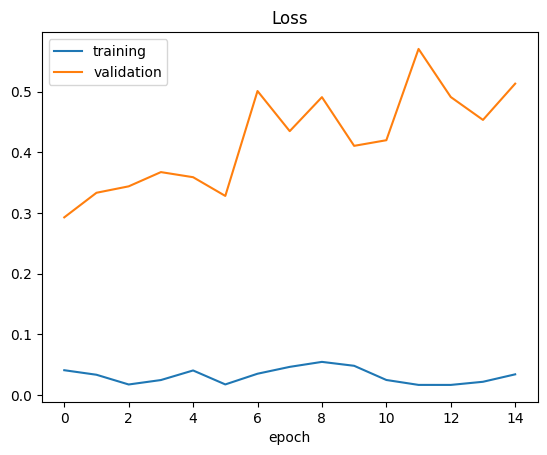

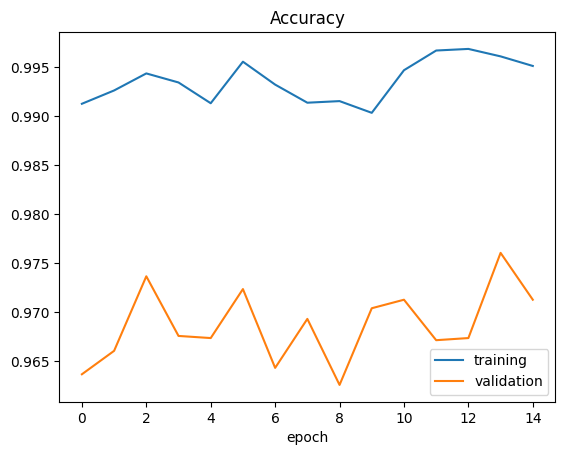

In [56]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()

# MODEL 2


In [58]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
model2 = Sequential()

model2.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', padding="same"))
model2.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu',padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        102464    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [61]:
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=256, verbose=2)

Epoch 1/15
72/72 - 11s - loss: 0.9673 - accuracy: 0.7186 - val_loss: 0.2992 - val_accuracy: 0.9183 - 11s/epoch - 151ms/step
Epoch 2/15
72/72 - 3s - loss: 0.2167 - accuracy: 0.9373 - val_loss: 0.1971 - val_accuracy: 0.9473 - 3s/epoch - 37ms/step
Epoch 3/15
72/72 - 3s - loss: 0.1308 - accuracy: 0.9612 - val_loss: 0.1504 - val_accuracy: 0.9610 - 3s/epoch - 38ms/step
Epoch 4/15
72/72 - 3s - loss: 0.0872 - accuracy: 0.9751 - val_loss: 0.1306 - val_accuracy: 0.9691 - 3s/epoch - 40ms/step
Epoch 5/15
72/72 - 3s - loss: 0.0725 - accuracy: 0.9778 - val_loss: 0.1083 - val_accuracy: 0.9723 - 3s/epoch - 38ms/step
Epoch 6/15
72/72 - 3s - loss: 0.0452 - accuracy: 0.9864 - val_loss: 0.1126 - val_accuracy: 0.9732 - 3s/epoch - 40ms/step
Epoch 7/15
72/72 - 3s - loss: 0.0375 - accuracy: 0.9883 - val_loss: 0.1092 - val_accuracy: 0.9747 - 3s/epoch - 39ms/step
Epoch 8/15
72/72 - 3s - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.1047 - val_accuracy: 0.9750 - 3s/epoch - 37ms/step
Epoch 9/15
72/72 - 3s - loss:

In [62]:
scores = model2.evaluate(X_test,y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 2.64%


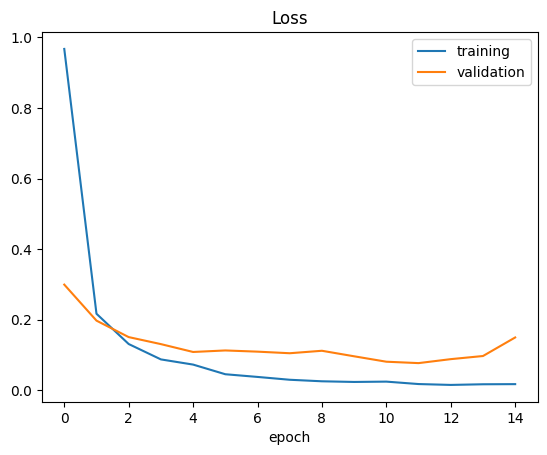

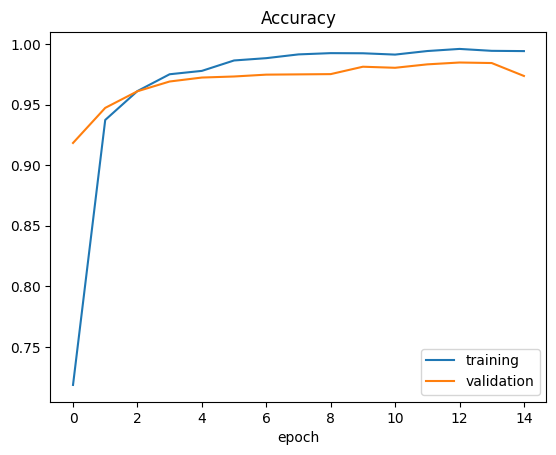

In [63]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()